In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('training_arrhytmia.dat', sep =' ', dtype = np.float32)
data = data.dropna(axis=1)
data = data.drop(data.columns[0], axis = 1)
data.columns = ['RR', 'QRSD']

test = pd.read_csv('recall_arrhytmia.dat', sep ='  ', dtype = np.float32)
test = test.dropna(axis=1)
test = test.drop(test.columns[0], axis = 1)
test.columns = ['RR', 'QRSD']

<ipython-input-319-ffbc2761f41d>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv('recall_arrhytmia.dat', sep ='  ', dtype = np.float32)


In [ ]:
#Fungsi sigmoid
def sigmoidf(value):
  return 1/ (1 + np.exp(-value))

#Menentukan region
def clustering(input):
  label = np.identity(7)
  region = ['' for i in range(len(input))]
  count = 0
  for i in input:
    if np.argmax(i) == np.argmax(label[0]):
      region[count] = 'Normal'
    elif np.argmax(i) == np.argmax(label[1]):
      region[count] = 'Region 1'
    elif np.argmax(i) == np.argmax(label[2]):
      region[count] = 'Region 2'
    elif np.argmax(i) == np.argmax(label[3]):
      region[count] = 'Region 3'
    elif np.argmax(i) == np.argmax(label[4]):
      region[count] = 'Region 4'
    elif np.argmax(i) == np.argmax(label[5]):
      region[count] = 'Region 5'
    elif np.argmax(i) == np.argmax(label[6]):
      region[count] = 'Region 6'

    count += 1
  return region

#menerjemahkan 
def transform_numeric(input, state = 0):
  label = np.identity(7)
  count = 0

  if state == 0:
    region = np.zeros(len(input))
    for i in input:
      if np.argmax(i) == np.argmax(label[0]):
        region[count] = 0.1
      elif np.argmax(i) == np.argmax(label[1]):
        region[count] = 0.2
      elif np.argmax(i) == np.argmax(label[2]):
        region[count] = 0.3
      elif np.argmax(i) == np.argmax(label[3]):
        region[count] = 0.4
      elif np.argmax(i) == np.argmax(label[4]):
        region[count] = 0.5
      elif np.argmax(i) == np.argmax(label[5]):
        region[count] = 0.6
      elif np.argmax(i) == np.argmax(label[6]):
        region[count] = 0.7
      
      count += 1
  
  elif state == 1:
    region = np.zeros(len(input), 7)
    for i in input:
      if 0 < input[count] and input[count] <= 0.1:
        region[count] = label[0]
      elif 0.1 < input[count] and input[count] <= 0.2:
        region[count] = label[1]
      elif 0.2 < input[count] and input[count] <= 0.3:
        region[count] = label[2]
      elif 0.3 < input[count] and input[count] <= 0.4:
        region[count] = label[3]
      elif 0.4 < input[count] and input[count] <= 0.5:
        region[count] = label[4]
      elif 0.5 < input[count] and input[count] <= 0.6:
        region[count] = label[5]
      elif 0.6 < input[count] and input[count] <= 0.7:
        region[count] = label[6]
      
      count += 1
    return region


In [ ]:
rr = data.iloc[:, 0].values
qrsd = data.iloc[:, 1].values

In [ ]:
labels = np.zeros((len(qrsd), 7))

In [ ]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
count = 0
for i, j in zip(rr, qrsd):
    # Normal
    if (0.6 <= i and i <= 1.2) and (80 <= j and j <= 97.5):
        labels[count, 0] = 1.0
    # Region 1
    elif  i < 0.32:
        labels[count, 1] = 1.0
    # Region 2
    elif (80 <= j and j < 95) and (0.32 < i and i < 0.60):
        labels[count, 2] = 1.0
    # Region 3
    elif (j >= 95) and (0.32 < i and i < 0.60):
        labels[count, 3] = 1.0
    # Region 4
    elif (0.6 <= i and i <= 1.2) and (j > 97.5):
        labels[count, 4] = 1.0
    # Region 5
    elif 1.2 < i and i < 1.66:
        labels[count, 5] = 1.0
    # Region 6
    elif i > 1.66:
        labels[count, 6] = 1.0
        
    count += 1   

In [ ]:
cluster = clustering(labels)

In [ ]:
data['Normal'] = labels[:, 0].T
data['Region 1'] = labels[:, 1].T
data['Region 2'] = labels[:, 2].T
data['Region 3'] = labels[:, 3].T
data['Region 4'] = labels[:, 4].T
data['Region 5'] = labels[:, 5].T
data['Region 6'] = labels[:, 6].T
data['Cluster'] = cluster
data

,RR,QRSD,Normal,Region 1,Region 2,Region 3,Region 4,Region 5,Region 6,Category,Cluster
0,0.93,88.199997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
1,0.86,87.139999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
2,0.83,89.550003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
3,0.96,91.669998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
4,0.94,91.650002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...
7795,2.04,113.389999,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Region 6,Region 6
7796,2.01,111.489998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Region 6,Region 6
7797,2.05,116.750000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Region 6,Region 6
7798,1.98,116.750000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Region 6,Region 6


In [ ]:
X_train = data.iloc[:, :2].values
Y_train = data.iloc[:, 2:-1].values

In [ ]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

<ipython-input-329-da1244b32aad>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c= ListedColormap(('red', 'green', 'blue', 'yellow', 'grey', 'black', 'purple'))(i), label = j)


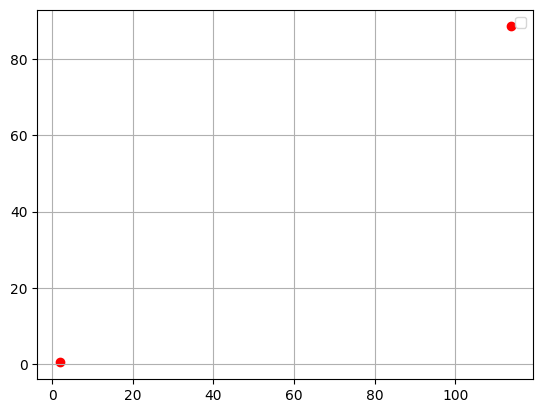

In [ ]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, transform_numeric(Y_train)

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c= ListedColormap(('red', 'green', 'blue', 'yellow', 'grey', 'black', 'purple'))(i), label = j)

plt.legend()
plt.grid()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [ ]:
w_i_h1 = np.random.uniform(-1, 1, (20, 2))
w_h1_h2 = np.random.uniform(-1, 1, (10, 20))
w_h2_o = np.random.uniform(-1, 1, (7, 10))
b_i_h1 = np.zeros((20, 1))
b_h1_h2 = np.zeros((10, 1))
b_h2_o = np.zeros((7, 1))

In [ ]:
u0 = 0.1 # initial learning rate
k = 0    
t = 1e2 # tao

In [ ]:
while True:
    se = 0
    for X, Y in zip(X_train, Y_train):
        X = X.reshape(2, 1)
        Y = Y.reshape(7, 1)

        # Layer 1 : input -> hidden
        h1_pre = np.dot(w_i_h1, X) + b_i_h1
        h1 = sigmoidf(h1_pre)
        # Layer 2 : hidden -> output
        h2_pre = np.dot(w_h1_h2, h1) + b_h1_h2
        h2 = sigmoidf(h2_pre)
        # Layer 3 : hidden -> output
        o_pre = np.dot(w_h2_o, h2) + b_h2_o
        o = sigmoidf(o_pre)
        
        # error
        se += (o - Y)**2
        
        # Learning rate
        u = u0 / (1 + (k/t))

        # Backpropagation : output -> hidden
        delta_o = (o - Y)
        w_h2_o += -u * delta_o @ np.transpose(h2)
        b_h2_o += -u * delta_o
       
        # Backpropagation : output -> hidden
        delta_h2 = np.transpose(w_h2_o) @ delta_o * (h2 * (1 - h2))
        w_h1_h2 += -u * delta_h2 @ np.transpose(h1)
        b_h1_h2 += -u * delta_h2
        
        # Backpropagation : hidden -> input
        delta_h1 = np.transpose(w_h1_h2) @ delta_h2 * (h1 * (1 - h1))
        w_i_h1 += -u * delta_h1 @ np.transpose(X)
        b_i_h1 += -u * delta_h1
        
    k += 1
    
    mse = se/len(X_train)
    print(np.average(mse))
    if np.average(mse) <= 1e-6:
        break

0.024522715794403314
0.0031278217466006717
0.0014734431890726445
0.001049453949481098
0.0007872295295801433
0.0006379250630708303
0.000489317598974722
0.00044198552527361447
0.00040136262562268365
0.00035023565898206706
0.0003153350315907919
0.00024505306203213557
0.0003234199198417193
0.00015729580391394797
0.00014550805300686032
0.00018775245286976988
0.0001370969796677767
0.00010625055682858062
3.8076890673414355e-05
0.00010723552888833368
8.865253809180835e-05
5.190094605503241e-05
1.8864023660210527e-05
5.116466052222157e-05
1.5431114105994102e-05
8.69726887000883e-05
0.00010453348686439331
4.488771855375881e-06
4.292474634452902e-06
4.054473575491424e-06
3.841406393711801e-06
3.6246137050725844e-06
3.411503910862724e-06
3.195271894774533e-06
2.971701154224747e-06
2.739926723414478e-06
2.505283378729162e-06
2.2793224280324955e-06
2.0746196771322508e-06
1.8975884495742544e-06
1.7467058982772186e-06
1.6167168323933985e-06
1.5027649155346927e-06
1.4015699136575234e-06
1.3110034637101

In [ ]:
X_test = test.iloc[:, :].values
X_test = sc.transform(X_test)

In [ ]:
cont = 0
y_pred = np.array([])
for i in X_test:
    # Layer 1 : input -> hidden
    h1_pre = np.dot(w_i_h1, i.reshape(2, 1)) + b_i_h1
    h1 = sigmoidf(h1_pre)
    # Layer 2 : hidden -> output
    h2_pre = np.dot(w_h1_h2, h1) + b_h1_h2
    h2 = sigmoidf(h2_pre)
    # Layer 3 : hidden -> output
    o_pre = np.dot(w_h2_o, h2) + b_h2_o
    o = sigmoidf(o_pre)

    y_pred = np.append(y_pred, o)

y_pred = y_pred.reshape((len(X_test), 7))

In [ ]:
y_pred = transform_numeric(y_pred)

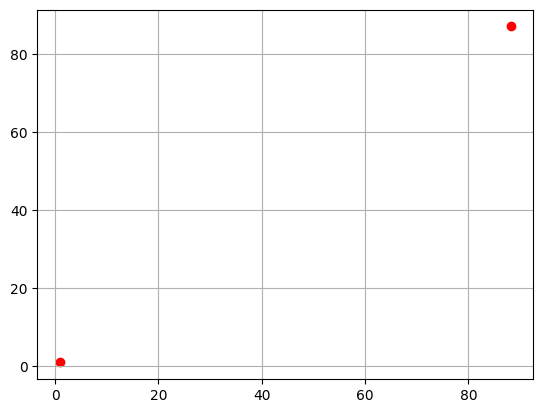

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1])
X_set, Y_set = sc.inverse_transform(X_test), y_pred   
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], color = ListedColormap(('red', 'green', 'blue', 'yellow', 'grey', 'black', 'purple'))(i), label = j)
plt.grid()